# 워드클라우드 과제
> 
> - 제출자 : 박성실
> - 검색어 : 은행특판 (한경 통합검색)

In [1]:
from IPython.display import Image 

In [2]:
from bs4 import BeautifulSoup
from selenium import webdriver
from selenium.webdriver.common.by import By
from IPython.display import Image

import pandas as pd
import time
import re

In [3]:
from konlpy.tag import Hannanum
from lxml import html
from collections import Counter
from urllib.request import urlopen

import sys
import random
import webbrowser
import pytagcloud 

pygame 2.1.2 (SDL 2.0.18, Python 3.9.12)
Hello from the pygame community. https://www.pygame.org/contribute.html


In [4]:
from bs4 import BeautifulSoup
from urllib.request import urlopen

In [5]:
from konlpy.tag import Okt

In [6]:
import nltk
from konlpy.tag import Kkma

In [7]:
# 한경닷컴 URL
# url = 'https://www.naver.com/'
# url = 'https://search.naver.com/search.naver?where=news&sm=tab_jum&query=%EC%9D%80%ED%96%89+%ED%8A%B9%ED%8C%90'
url = 'https://search.hankyung.com/apps.frm/search.news?query=%EC%9D%80%ED%96%89+%ED%8A%B9%ED%8C%90&mediaid_clust=HKPAPER,HKCOM'
html = urlopen(url)
soup = BeautifulSoup(html, 'lxml')
soup.title

<title>한경닷컴 통합검색</title>

In [8]:
soup

<!DOCTYPE html>
<html lang="ko">
<head>
<meta charset="utf-8" content="IE=Edge,chrome=1" http-equiv="X-UA-Compatible"/>
<meta content="No-Cache" http-equiv="Cache-Control"/>
<meta content="No-Cache" http-equiv="Pragma"/>
<meta content="한국경제" name="description"/>
<title>한경닷컴 통합검색</title>
<link href="//static.hankyung.com/favicon.ico" rel="shortcut icon"/>
<link href="//static.hankyung.com/plugin/jquery-ui/jquery-ui.min.css" rel="stylesheet"/>
<link href="//static.hankyung.com/css/search/w/common.202108.css?v=202204141117" rel="stylesheet"/>
<script async="true" charset="utf-8" src="//static.hankyung.com/js/ga/googleTagManager.js?v=202204141117" type="text/javascript"></script>
<script src="//static.hankyung.com/plugin/jquery-1.12.4.min.js" type="text/javascript"></script>
<script src="//static.hankyung.com/plugin/jquery.cookie.js" type="text/javascript"></script>
<script src="//static.hankyung.com/plugin/jquery-ui/jquery-ui.min.js" type="text/javascript"></script>
<script src="//static.

In [9]:
ul_tag = soup.find('ul','article')
ul_tag

<ul class="article">
<li>
<div class="txt_wrap">
<a href="https://www.hankyung.com/economy/article/202206137108i" target="_blank">
<em class="tit" data-pm="N">광주<strong class="keyword">은행</strong>, 최고 연 5% 금리 '전남청년 미래적금' 출시</em>
</a>
<p class="txt">광주<strong class="keyword">은행</strong>은 전남청년 문화복지카드 ‘1st-Y 전남청년 문화복지카드’ 출시를 기념해 1만좌 한정 <strong class="keyword">특판</strong>으로 진행하는 ‘전남청년 미래적금’을 출시했다고 밝혔다.  전남청년 미래적금은 ‘1st-Y 전남청년 문화복지카드’를 발급한 고객에 한해 1년제로 가입 가능하다. 월 1만원부터 최고 20만원까지 자유적립식으로 가입할 수 있다.  기본금리 연 3.0%에 우대금리 최고 연 2.0% 포인트를 제공해 ...</p>
<p class="info">
<span>한국경제</span>
                                                    | <span class="date_time">2022.06.13 15:44</span>
 | 김보형                                                </p>
<div class="hash_wrap">
<span><a href="http://news.hankyung.com/tag/광주은행">#광주<strong class="keyword">은행</strong></a></span>
</div>
</div>
</li>
<li>
<div class="txt_wrap">
<a href="https://www.hankyung.com/economy/article/2022061029841" target="_blank">
<em clas

In [10]:
len(ul_tag)

21

In [11]:
p_tag = ul_tag.find_all('p','txt')
p_tag

[<p class="txt">광주<strong class="keyword">은행</strong>은 전남청년 문화복지카드 ‘1st-Y 전남청년 문화복지카드’ 출시를 기념해 1만좌 한정 <strong class="keyword">특판</strong>으로 진행하는 ‘전남청년 미래적금’을 출시했다고 밝혔다.  전남청년 미래적금은 ‘1st-Y 전남청년 문화복지카드’를 발급한 고객에 한해 1년제로 가입 가능하다. 월 1만원부터 최고 20만원까지 자유적립식으로 가입할 수 있다.  기본금리 연 3.0%에 우대금리 최고 연 2.0% 포인트를 제공해 ...</p>,
 <p class="txt">... 챙길 수 있는 수시입출금식 통장, 이른바 ‘파킹 통장’의 금리가 줄줄이 오르고 있다.  저축<strong class="keyword">은행</strong> 업계 자산 규모 4위인 웰컴저축<strong class="keyword">은행</strong>은 10일부터 수시입출식 보통예금인 ‘웰컴 직장인사랑 보통예금’의 ... ‘OK읏통장’과 최고 금리는 연 3%로 같지만 적용 한도가 5000만원으로 10배 더 높다.  OK저축<strong class="keyword">은행</strong>은 하루만 맡겨도 연 2.5% 이자를 받을 수 있는 ‘중도해지OK정기예금’ <strong class="keyword">특판</strong>을 총 3000억원 ...</p>,
 <p class="txt">OK저축<strong class="keyword">은행</strong>이 하루만 맡겨도 연 2.5% 금리를 받을 수 있는 '중도해지OK정기예금'을 특별판매한다고 7일 밝혔다.  이 상품은 만기 3년의 정기예금이지만 중도 해지하더라도 특별 약정금리인 연 2.5%를 그대로 받을 ... 필요할 때마다 중도 해지를 하면 그 때마다 해지 금액에 대해 연 2.5%에 해당하는 이자를 함께 받을 수 있다.  <strong class="keyword">특판</strong> 금리는 이날부터 적용되며 총 3000억원 한도가 

In [12]:
p_tag[0].get_text()

'광주은행은 전남청년 문화복지카드 ‘1st-Y 전남청년 문화복지카드’ 출시를 기념해 1만좌 한정 특판으로 진행하는 ‘전남청년 미래적금’을 출시했다고 밝혔다.  전남청년 미래적금은 ‘1st-Y 전남청년 문화복지카드’를 발급한 고객에 한해 1년제로 가입 가능하다. 월 1만원부터 최고 20만원까지 자유적립식으로 가입할 수 있다.  기본금리 연 3.0%에 우대금리 최고 연 2.0% 포인트를 제공해 ...'

In [13]:
news = p_tag[0].get_text()
len(news)

222

In [14]:
news1 = list()
news2 = str()

for p_tags in p_tag[0:9]:
    news = p_tags.get_text()
    news1.append(news)
    news2 = ' '.join(news1)
    
    # print(' '.join(news1))

In [15]:
news2

'광주은행은 전남청년 문화복지카드 ‘1st-Y 전남청년 문화복지카드’ 출시를 기념해 1만좌 한정 특판으로 진행하는 ‘전남청년 미래적금’을 출시했다고 밝혔다.  전남청년 미래적금은 ‘1st-Y 전남청년 문화복지카드’를 발급한 고객에 한해 1년제로 가입 가능하다. 월 1만원부터 최고 20만원까지 자유적립식으로 가입할 수 있다.  기본금리 연 3.0%에 우대금리 최고 연 2.0% 포인트를 제공해 ... ... 챙길 수 있는 수시입출금식 통장, 이른바 ‘파킹 통장’의 금리가 줄줄이 오르고 있다.  저축은행 업계 자산 규모 4위인 웰컴저축은행은 10일부터 수시입출식 보통예금인 ‘웰컴 직장인사랑 보통예금’의 ... ‘OK읏통장’과 최고 금리는 연 3%로 같지만 적용 한도가 5000만원으로 10배 더 높다.  OK저축은행은 하루만 맡겨도 연 2.5% 이자를 받을 수 있는 ‘중도해지OK정기예금’ 특판을 총 3000억원 ... OK저축은행이 하루만 맡겨도 연 2.5% 금리를 받을 수 있는 \'중도해지OK정기예금\'을 특별판매한다고 7일 밝혔다.  이 상품은 만기 3년의 정기예금이지만 중도 해지하더라도 특별 약정금리인 연 2.5%를 그대로 받을 ... 필요할 때마다 중도 해지를 하면 그 때마다 해지 금액에 대해 연 2.5%에 해당하는 이자를 함께 받을 수 있다.  특판 금리는 이날부터 적용되며 총 3000억원 한도가 소진되면 자동 종료된다.  OK저축은행은 이와 함께 OK저축은행은 ... ... 된서리를 맞았다. 코로나19 장기화에 따른 공급망 붕괴와 우크라이나전쟁 등이 글로벌 인플레이션을 촉발했고 각국 중앙은행이 기준금리 인상과 통화 긴축으로 대응하고 있기 때문이다. 인플레가 단기간에 해소되기 어려운 만큼 하반기에도 금리 ... 비대면 정기예금에 대해 1년 만기 연 3.15%, 한국투자저축은행은 연 3.16%를 주고 있다. 상상인플러스저축은행은 가입 후 12개월 주기로 약정이율이 변동되는 회전식 정기예금을 특판(1000억원 한도) 형식으로 판매 중이다. ... 한국은행의 기준

In [16]:
news2 = news2.replace('...', ' ')
news2 = news2.replace('\'', ' ')
news2 = news2.replace('연', ' ')
news2 = news2.replace('수', ' ')
news2 = news2.replace('총', ' ')
news2 = news2.replace('를', ' ')
news2 = news2.replace('등', ' ')
news2 = news2.strip()
news2

'광주은행은 전남청년 문화복지카드 ‘1st-Y 전남청년 문화복지카드’ 출시  기념해 1만좌 한정 특판으로 진행하는 ‘전남청년 미래적금’을 출시했다고 밝혔다.  전남청년 미래적금은 ‘1st-Y 전남청년 문화복지카드’  발급한 고객에 한해 1년제로 가입 가능하다. 월 1만원부터 최고 20만원까지 자유적립식으로 가입할   있다.  기본금리   3.0%에 우대금리 최고   2.0% 포인트  제공해     챙길   있는  시입출금식 통장, 이른바 ‘파킹 통장’의 금리가 줄줄이 오르고 있다.  저축은행 업계 자산 규모 4위인 웰컴저축은행은 10일부터  시입출식 보통예금인 ‘웰컴 직장인사랑 보통예금’의   ‘OK읏통장’과 최고 금리는   3%로 같지만 적용 한도가 5000만원으로 10배 더 높다.  OK저축은행은 하루만 맡겨도   2.5% 이자  받을   있는 ‘중도해지OK정기예금’ 특판을   3000억원   OK저축은행이 하루만 맡겨도   2.5% 금리  받을   있는  중도해지OK정기예금 을 특별판매한다고 7일 밝혔다.  이 상품은 만기 3년의 정기예금이지만 중도 해지하더라도 특별 약정금리인   2.5%  그대로 받을   필요할 때마다 중도 해지  하면 그 때마다 해지 금액에 대해   2.5%에 해당하는 이자  함께 받을   있다.  특판 금리는 이날부터 적용되며   3000억원 한도가 소진되면 자동 종료된다.  OK저축은행은 이와 함께 OK저축은행은     된서리  맞았다. 코로나19 장기화에 따른 공급망 붕괴와 우크라이나전쟁  이 글로벌 인플레이션을 촉발했고 각국 중앙은행이 기준금리 인상과 통화 긴축으로 대응하고 있기 때문이다. 인플레가 단기간에 해소되기 어려운 만큼 하반기에도 금리   비대면 정기예금에 대해 1년 만기   3.15%, 한국투자저축은행은   3.16%  주고 있다. 상상인플러스저축은행은 가입 후 12개월 주기로 약정이율이 변동되는 회전식 정기예금을 특판(1000억원 한도) 형식으로 판매 중이다.   한국은행의 기준금리 인상 속도가 가팔라지면서 저축은

In [17]:
okt = Okt()

In [18]:
# 트위터 형태소 분석 후 명사만 추출
news2_nouns = okt.nouns(news2)
len(news2_nouns)

397

In [19]:
news2_nouns[:10]

['광주', '은행', '전남', '청년', '문화', '복지', '카드', '전남', '청년', '문화']

In [20]:
news_f  = nltk.Text(news2_nouns, name='특판')
type(news_f), len(news_f)

(nltk.text.Text, 397)

In [21]:
# 상위 50개 수 
news_f.vocab().most_common(50)

[('금리', 21),
 ('저축은행', 16),
 ('정기예금', 15),
 ('특판', 9),
 ('포인트', 8),
 ('상품', 8),
 ('이', 7),
 ('가입', 6),
 ('한도', 6),
 ('인상', 6),
 ('전남', 5),
 ('청년', 5),
 ('적금', 5),
 ('최고', 5),
 ('우대금리', 5),
 ('해지', 5),
 ('은행', 4),
 ('의', 4),
 ('중도', 4),
 ('특별', 4),
 ('판매', 4),
 ('예금', 4),
 ('문화', 3),
 ('복지', 3),
 ('카드', 3),
 ('출시', 3),
 ('한정', 3),
 ('고객', 3),
 ('기본', 3),
 ('제공', 3),
 ('통장', 3),
 ('적용', 3),
 ('이자', 3),
 ('자동', 3),
 ('개월', 3),
 ('정기적금', 3),
 ('앱', 3),
 ('뱅킹', 3),
 ('골든', 3),
 ('리치', 3),
 ('이벤트', 3),
 ('차', 3),
 ('기념', 2),
 ('진행', 2),
 ('미래', 2),
 ('적립', 2),
 ('업계', 2),
 ('위인', 2),
 ('웰컴', 2),
 ('보통예금', 2)]

In [22]:
from matplotlib import font_manager, rc

font_name = font_manager.FontProperties(fname="C:/Windows/Fonts/malgun.ttf").get_name()
rc('font', family=font_name)

In [23]:
# nltk패키지를 통해 konlpy에서 뽑은 명사들 상위 500개 추출
data = news_f.vocab().most_common(150)
len(data)

150

In [24]:
data[:10]

[('금리', 21),
 ('저축은행', 16),
 ('정기예금', 15),
 ('특판', 9),
 ('포인트', 8),
 ('상품', 8),
 ('이', 7),
 ('가입', 6),
 ('한도', 6),
 ('인상', 6)]

In [25]:
# data를 딕셔너리 형태로 변환
dict_data = dict(data)
len(dict_data)

150

In [26]:
%matplotlib inline
import matplotlib.pyplot as plt
from wordcloud import WordCloud

In [27]:
wordcloud = WordCloud(font_path='C:/Windows/Fonts/malgun.ttf',
                      background_color='white'
                     ,relative_scaling =0.2).generate_from_frequencies(dict_data)

(-0.5, 399.5, 199.5, -0.5)

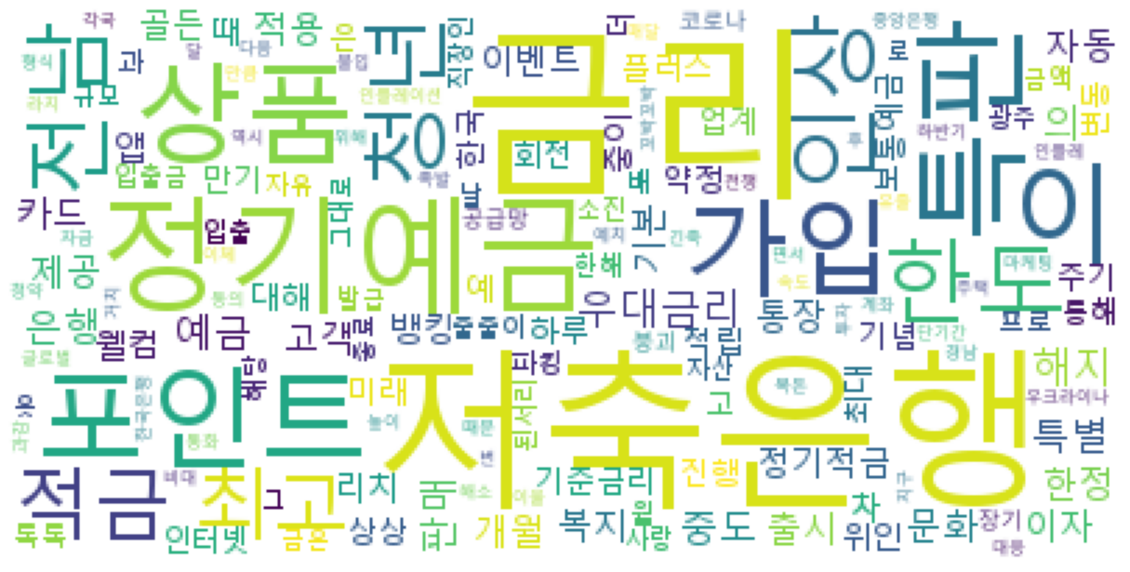

In [28]:
plt.figure(figsize=(20,12))
plt.imshow(wordcloud)
plt.axis('off')

In [29]:
%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np

from PIL import Image
from wordcloud import WordCloud
from wordcloud import ImageColorGenerator

(-0.5, 444.5, 430.5, -0.5)

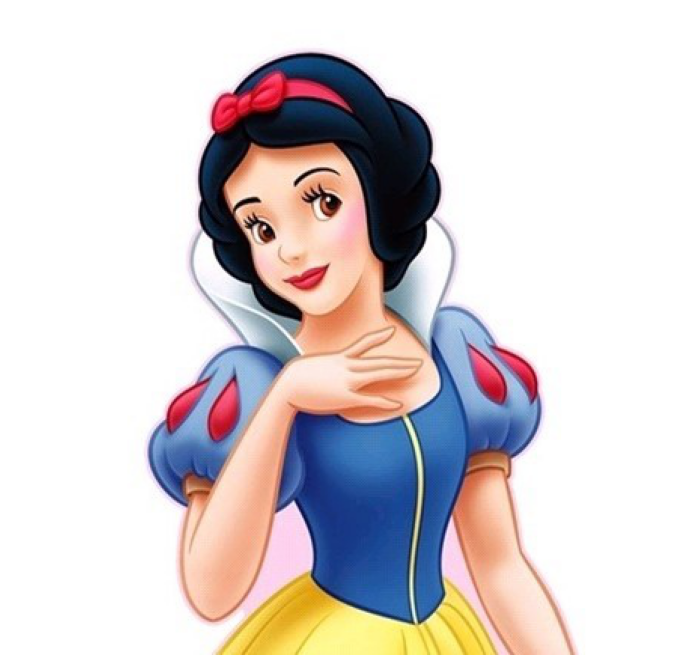

In [30]:
# 사진 데이터를 pil 패키지의 Image를 활용해서 0~255 데이터로 읽어왔다.
princess_mask = np.array(Image.open('images/princess.jpg'))
image_color = ImageColorGenerator(princess_mask)
plt.figure(figsize=(12,12))
plt.imshow(princess_mask)
plt.axis('off')

In [31]:
wordcloud = WordCloud(font_path='C:/Windows/Fonts/malgun.ttf',
                        relative_scaling = 0.2,
                        mask = princess_mask, 
                        background_color = 'white',
                        min_font_size=1, 
                        max_font_size=15, 
                        width=1600, 
                        height=900).generate_from_frequencies(dict_data)

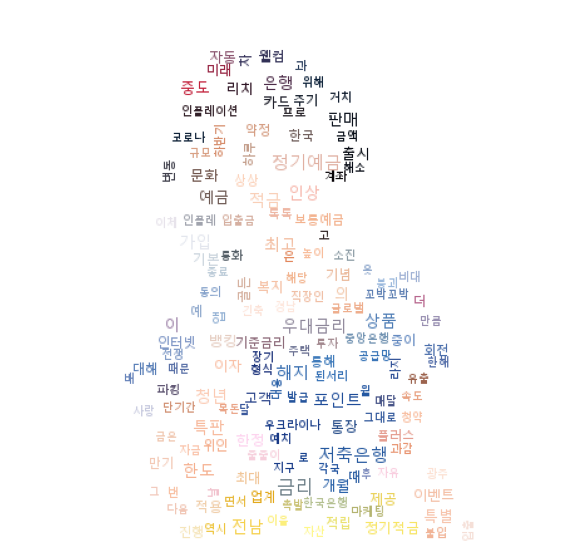

In [32]:
plt.figure(figsize=(10,10))
plt.imshow(wordcloud.recolor(color_func=image_color))
plt.axis('off')
plt.savefig('wordcloud/princess_tp_1.png')

In [33]:
wordcloud = WordCloud(font_path='C:/Windows/Fonts/malgun.ttf',
                        relative_scaling = 0.2,
                        mask = princess_mask, 
                        background_color = 'white',
                        min_font_size=6, 
                        max_font_size=80, 
                        width=1600, 
                        height=900).generate_from_frequencies(dict_data)

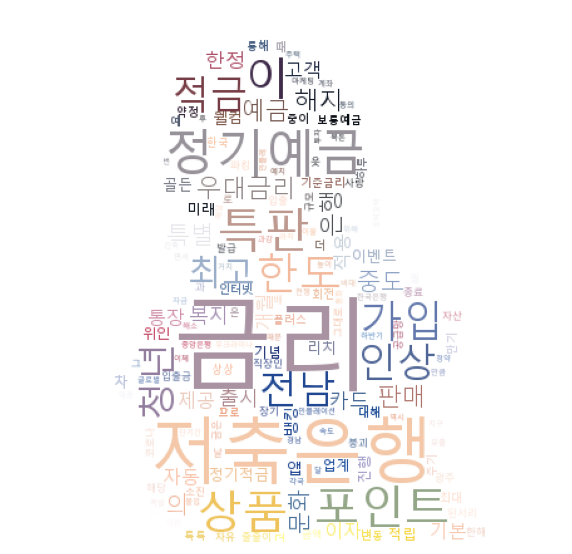

In [34]:
plt.figure(figsize=(10,10))
plt.imshow(wordcloud.recolor(color_func=image_color))
plt.axis('off')
plt.savefig('wordcloud/princess_tp_2.png')